In [35]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [36]:
# Load the datasets
customers_df =pd.read_csv(r'C:\Users\Admin\ecommerce_analysis\data\Customers.csv')
products_df = pd.read_csv(r'C:\Users\Admin\ecommerce_analysis\data\Products.csv')
transactions_df = pd.read_csv(r'C:\Users\Admin\ecommerce_analysis\data\Transactions.csv')

In [37]:
# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


In [38]:
# 1. Customer Analysis
print("=== Customer Analysis ===")
print("\nTotal number of customers:", len(customers_df))
print("\nCustomer distribution by region:")
region_dist = customers_df['Region'].value_counts()
print(region_dist)


=== Customer Analysis ===

Total number of customers: 200

Customer distribution by region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


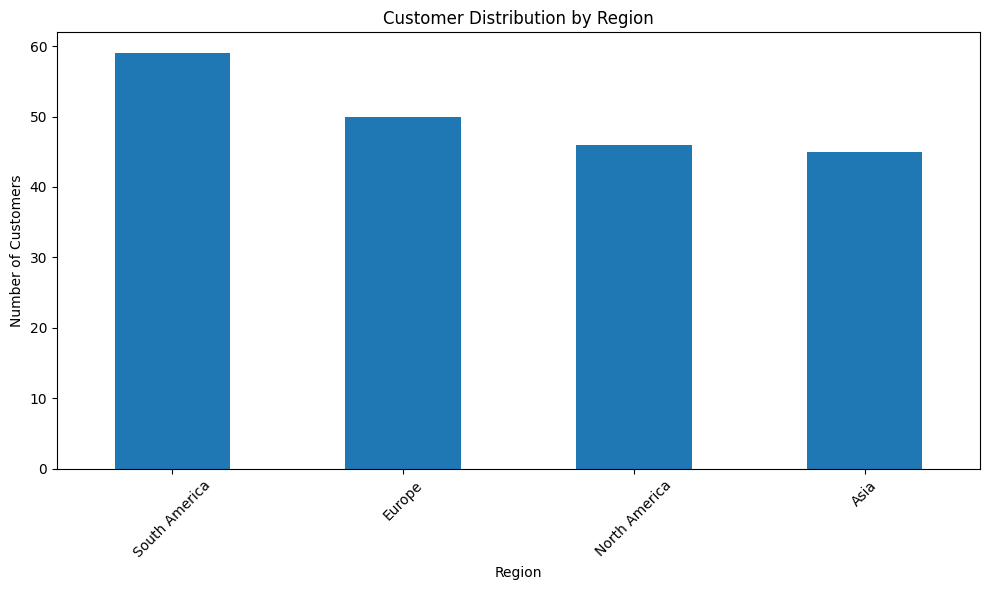

In [39]:
# Visualize customer distribution by region
plt.figure(figsize=(10, 6))
region_dist.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


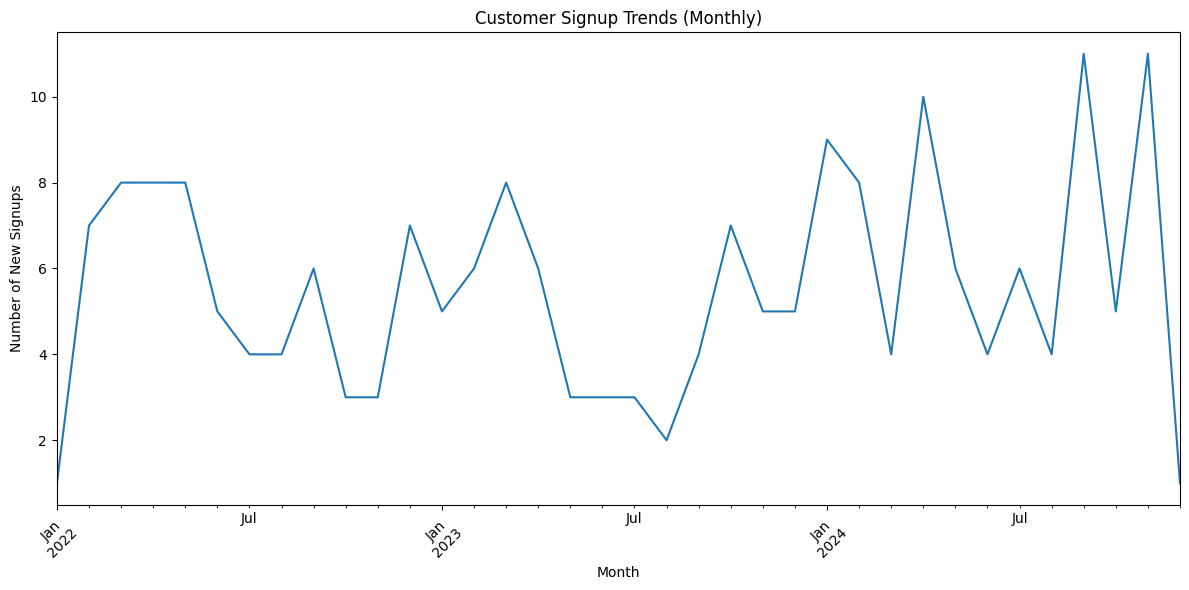

In [40]:
# Customer signup trends
plt.figure(figsize=(12, 6))
customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Customer Signup Trends (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of New Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# 2. Product Analysis
print("\n=== Product Analysis ===")
print("\nTotal number of products:", len(products_df))
print("\nProduct distribution by category:")
category_dist = products_df['Category'].value_counts()
print(category_dist)



=== Product Analysis ===

Total number of products: 100

Product distribution by category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


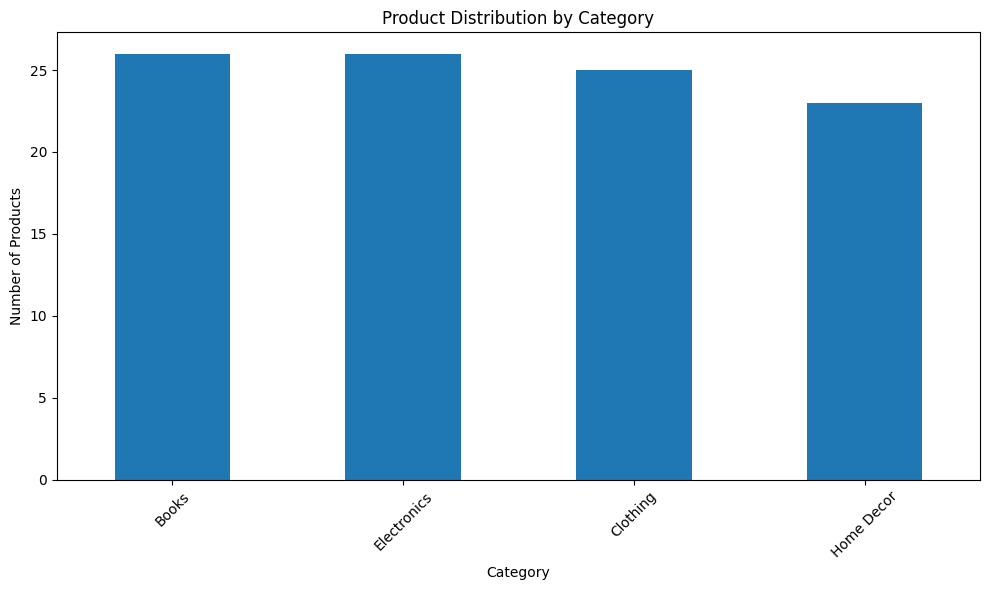

In [42]:
# Visualize product categories
plt.figure(figsize=(10, 6))
category_dist.plot(kind='bar')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


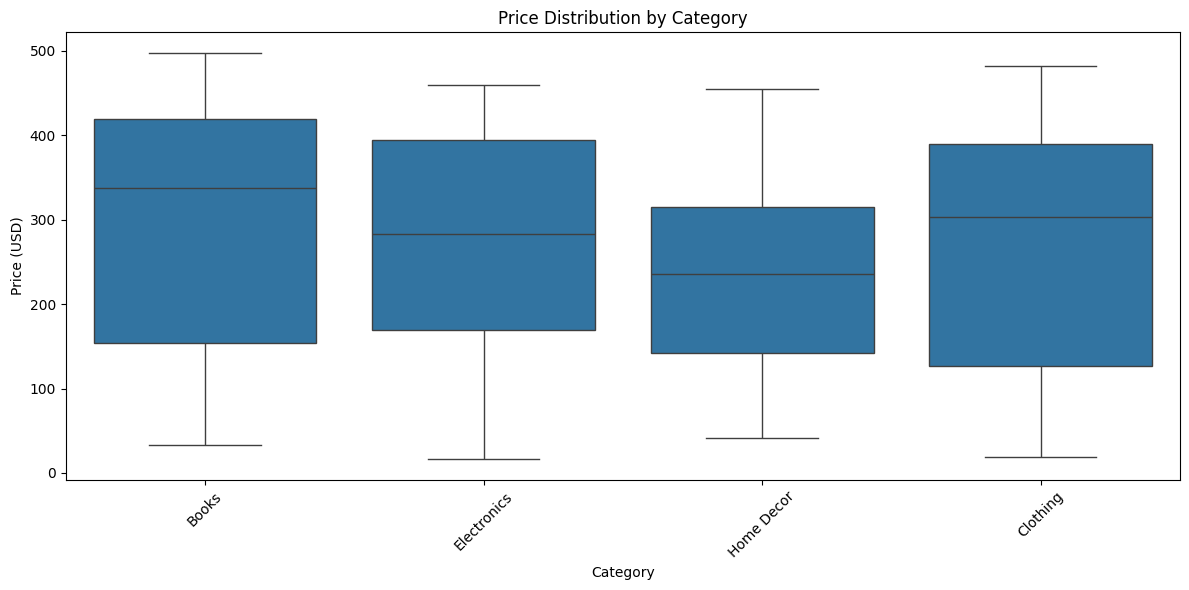

In [43]:
# Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products_df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
# 3. Transaction Analysis
print("\n=== Transaction Analysis ===")
print("\nTotal number of transactions:", len(transactions_df))
print("\nTotal revenue: $", transactions_df['TotalValue'].sum())
print("Average transaction value: $", transactions_df['TotalValue'].mean())



=== Transaction Analysis ===

Total number of transactions: 1000

Total revenue: $ 689995.56
Average transaction value: $ 689.9955600000001


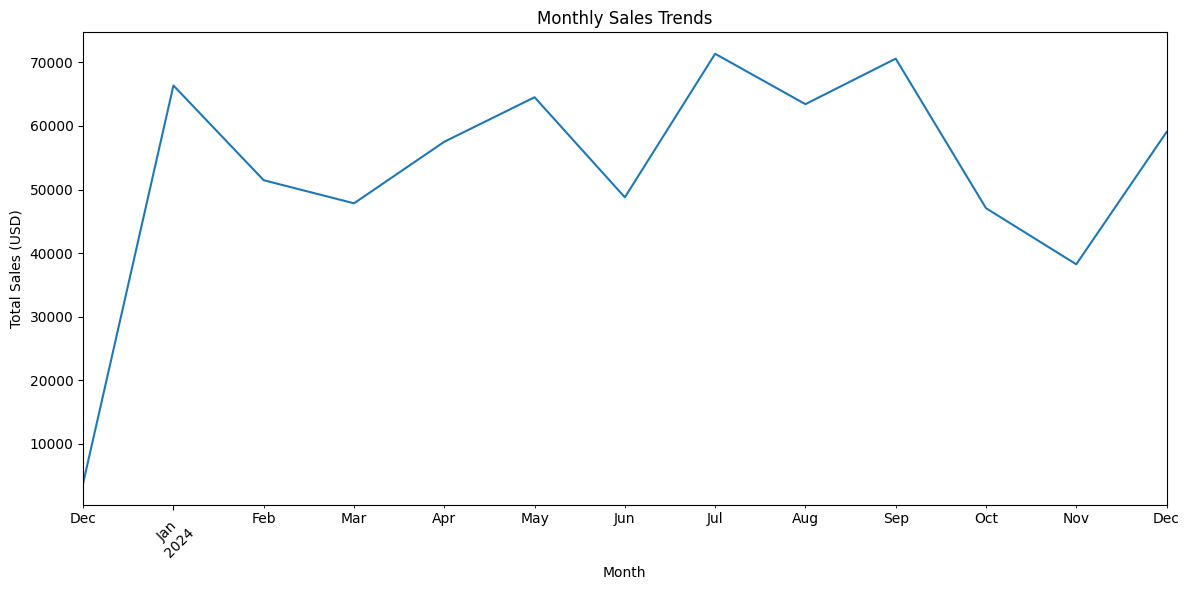

In [45]:
# Monthly sales trends
monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


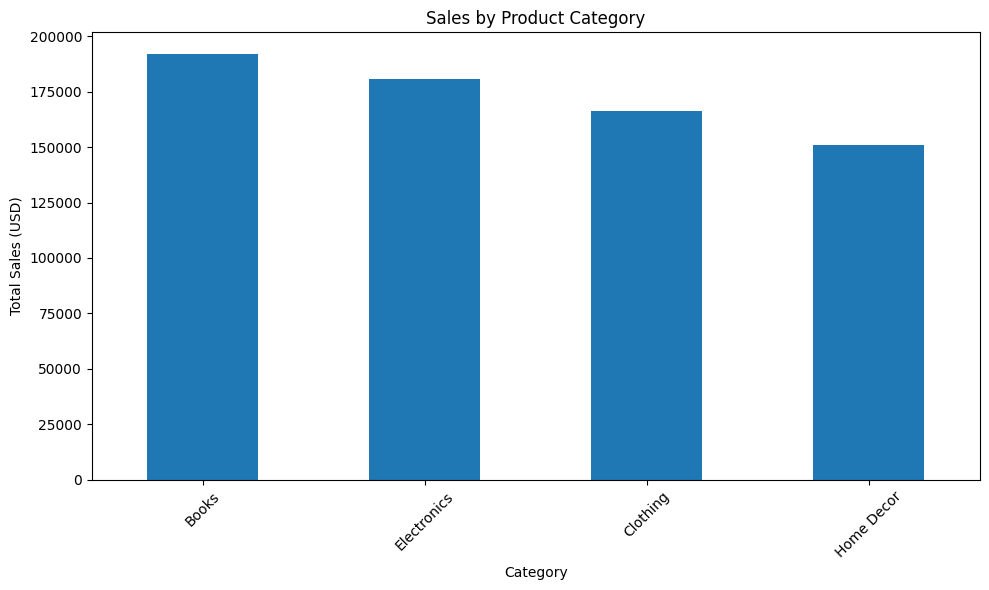

In [46]:
# Sales by category
sales_by_category = transactions_df.merge(products_df, on='ProductID')\
    .groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
# 4. Customer Behavior Analysis
# Average order value by region
avg_order_by_region = transactions_df.merge(customers_df, on='CustomerID')\
    .groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("\nAverage order value by region:")
print(avg_order_by_region)



Average order value by region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


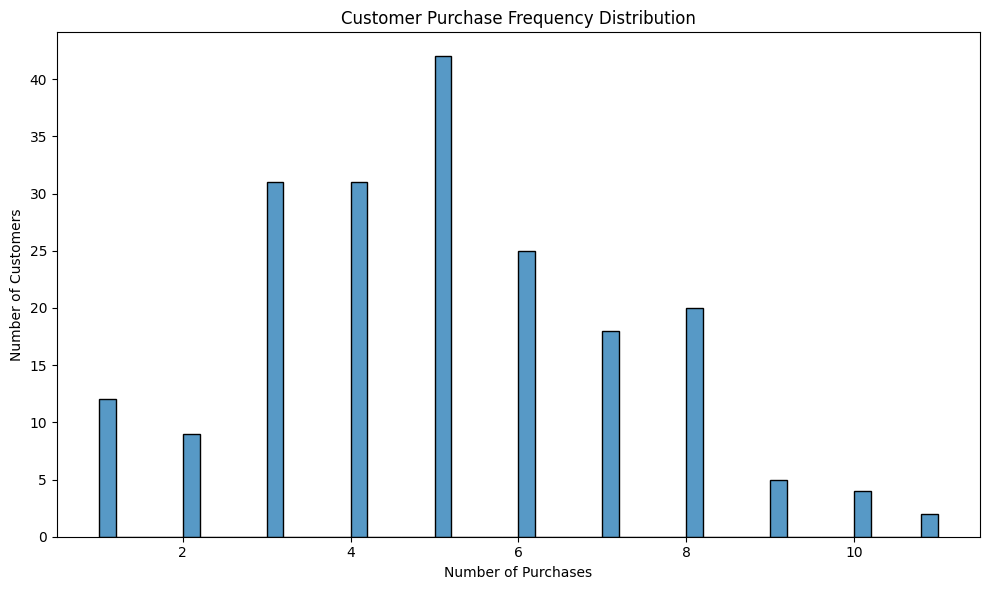

In [48]:
# Customer purchase frequency
purchase_frequency = transactions_df.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, bins=50)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [49]:
# 5. Advanced Metrics
# Calculate customer lifetime value (CLV)
clv = transactions_df.groupby('CustomerID')['TotalValue'].sum()
print("\nCustomer Lifetime Value Statistics:")
print(clv.describe())



Customer Lifetime Value Statistics:
count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64


In [50]:
# Calculate product performance metrics
product_metrics = transactions_df.groupby('ProductID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TransactionID': 'Number_of_Sales'})
product_metrics['Average_Order_Value'] = product_metrics['TotalValue'] / product_metrics['Number_of_Sales']

print("\nTop 10 Products by Revenue:")
print(product_metrics.sort_values('TotalValue', ascending=False).head(10))


Top 10 Products by Revenue:
           Quantity  TotalValue  Number_of_Sales  Average_Order_Value
ProductID                                                            
P029             45    19513.80               17          1147.870588
P079             43    17946.91               16          1121.681875
P048             43    17905.20               15          1193.680000
P020             38    15060.92               12          1255.076667
P062             39    14592.24               16           912.015000
P059             46    13947.20               19           734.063158
P039             32    13778.88               12          1148.240000
P083             30    13671.60               13          1051.661538
P019             35    13487.95               11          1226.177273
P041             29    13232.12               11          1202.920000
